<a href="https://colab.research.google.com/github/BairaviB/Playground/blob/main/better_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
#read the image and show the image

In [127]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import cv2

2021-05-28 09:42:39 URL:https://ucscgenomics.soe.ucsc.edu/wp-content/uploads/Screen-Shot-2019-09-03-at-11.27.12-AM.png [525584/525584] -> "man.png" [1]


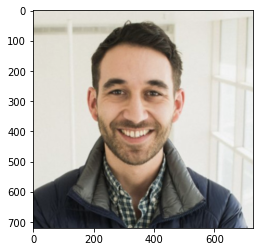

In [128]:
!wget -nv https://ucscgenomics.soe.ucsc.edu/wp-content/uploads/Screen-Shot-2019-09-03-at-11.27.12-AM.png -O man.png

img = Image.open('./man.png')
plt.imshow(img); 
plt.show()

In [6]:
#resize the image to the size of 224

In [130]:

img_op = Image.open('./man.png')
rgb_img = img_op.convert('RGB')
new_image_resized = rgb_img.resize((224, 224))

new_image_resized.save('image_resized1.png')

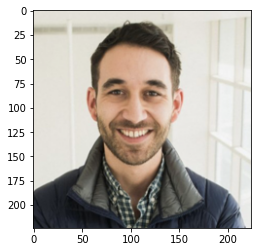

In [131]:
img_resize = Image.open('image_resized1.png')
plt.imshow(img_resize)

In [132]:
#Image segmentation

In [133]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [134]:

# Apply the transformations needed
import torchvision.transforms as T
trf = T.Compose([T.Resize(230),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img_resize).unsqueeze(0)

In [135]:
out = fcn(inp)['out']
print (out.shape)

torch.Size([1, 21, 224, 224])


In [136]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[ 0 15]


In [137]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(255,255,255),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (0,0,0),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

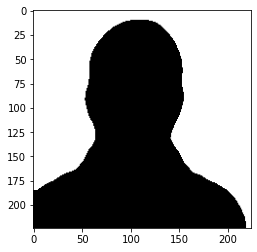

In [138]:
rgb = decode_segmap(om)
plt.imshow(rgb);
plt.show()

In [139]:
#The pyrUp() function increases the size to double of its original size and pyrDown​() function decreases the size to half

In [140]:
img_small = cv2.pyrDown(rgb)



In [141]:
#apply bilateralfilter

In [142]:
num_iter = 5
for _ in range(num_iter):
    img_small= cv2.bilateralFilter(img_small, d=9, sigmaColor=9, sigmaSpace=7)

In [144]:
img_rgb = cv2.pyrUp(img_small)

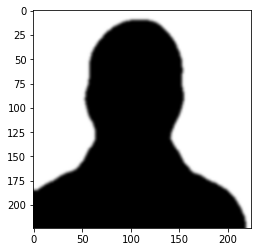

In [145]:
plt.imshow(img_rgb)
plt.show()

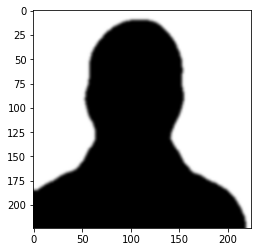

In [146]:
mask = img_rgb
plt.imshow(mask)

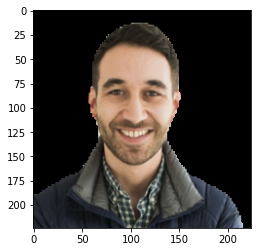

In [147]:
masked_image = np.copy(img_resize)
masked_image[mask !=0] = [0]
plt.imshow(masked_image)

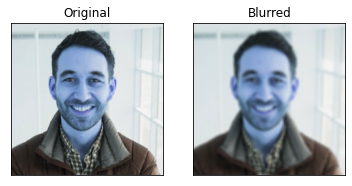

In [148]:
#applying blur

blur_img = cv2.imread('image_resized1.png')
blur = cv2.blur(blur_img,(5,5))
plt.subplot(121),plt.imshow(blur_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

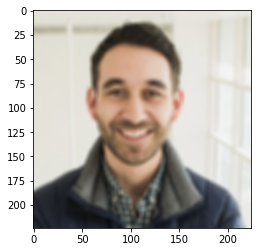

In [149]:

#convert blured img from bgr to rgb

blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
plt.imshow(blur_rgb)

In [150]:
from PIL import Image
background1 = Image.fromarray(blur_rgb)
background1.save("space_background.png")

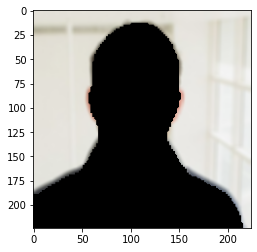

In [151]:
background_image = cv2.imread('space_background.png')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = background_image[0:514, 0:816]

crop_background[mask == 0] = [0]
plt.imshow(crop_background)

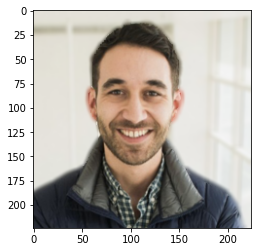

In [152]:
complete_image = masked_image + crop_background
plt.imshow(complete_image)

In [153]:
#adding diff background

!wget -nv https://image.similarpng.com/very-thumbnail/2020/08/Abstract-blue-wave-on-transparent-background-PNG.png -O newbg.png


new_op = Image.open('./newbg.png')
rgb_new = new_op.convert('RGB')
new_image_bg = rgb_new.resize((224, 224))

new_image_bg.save('image_resized_bg.png')

2021-05-28 09:44:32 URL:https://image.similarpng.com/very-thumbnail/2020/08/Abstract-blue-wave-on-transparent-background-PNG.png [74242/74242] -> "newbg.png" [1]


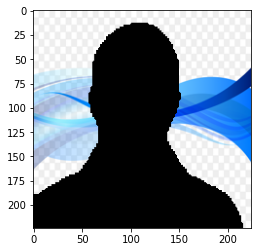

In [154]:
background_image_new = cv2.imread('image_resized_bg.png')
background_image_new = cv2.cvtColor(background_image_new, cv2.COLOR_BGR2RGB)
crop_background_new = background_image_new[0:514, 0:816]

crop_background_new[mask == 0] = [0]
plt.imshow(crop_background_new)

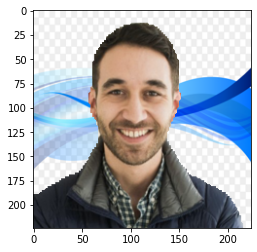

In [155]:
complete_image_newbg = masked_image + crop_background_new
plt.imshow(complete_image_newbg)

In [161]:
#adding diff background #bg2

!wget -nv https://source.unsplash.com/WLUHO9A_xik/1600x900 -O newbg2.jpg


new_op1 = Image.open('./newbg2.jpg')
rgb_new1 = new_op1.convert('RGB')
new_image_bg2 = rgb_new1.resize((224, 224))

new_image_bg2.save('image_resized_bg2.jpg')


2021-05-28 09:58:11 URL:https://images.unsplash.com/uploads/141310026617203b5980d/c86b8baa?crop=entropy&cs=tinysrgb&fit=crop&fm=jpg&h=900&ixid=MnwxfDB8MXxhbGx8fHx8fHx8fHwxNjIxNTc0MjEx&ixlib=rb-1.2.1&q=80&utm_campaign=api-credit&utm_medium=referral&utm_source=unsplash_source&w=1600 [208208/208208] -> "newbg2.jpg" [1]


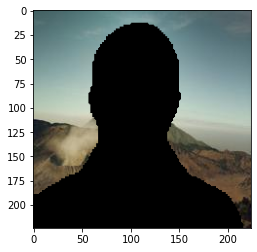

In [162]:
background_image_new = cv2.imread('image_resized_bg2.jpg')
background_image_new = cv2.cvtColor(background_image_new, cv2.COLOR_BGR2RGB)
crop_background_new = background_image_new[0:514, 0:816]

crop_background_new[mask == 0] = [0]
plt.imshow(crop_background_new)

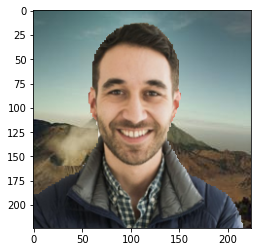

In [163]:
complete_image_newbg = masked_image + crop_background_new
plt.imshow(complete_image_newbg)

In [166]:
#adding diff background #bg3

!wget -nv https://source.unsplash.com/rCbdp8VCYhQ-O newbg3.jpg


new_op2 = Image.open('./newbg3.jpg')
rgb_new2 = new_op2.convert('RGB')
new_image_bg3 = rgb_new2.resize((224, 224))

new_image_bg3.save('image_resized_bg3.jpg')


2021-05-28 10:12:00 URL:https://images.unsplash.com/source-404?fit=crop&fm=jpg&h=800&q=60&w=1200 [41877/41877] -> "rCbdp8VCYhQ-O" [1]
wget: unable to resolve host address ‘newbg3.jpg’
FINISHED --2021-05-28 10:12:00--
Total wall clock time: 0.5s
Downloaded: 1 files, 41K in 0.01s (3.41 MB/s)


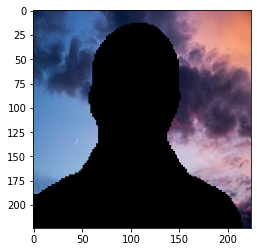

In [167]:
background_image_new = cv2.imread('image_resized_bg3.jpg')
background_image_new = cv2.cvtColor(background_image_new, cv2.COLOR_BGR2RGB)
crop_background_new = background_image_new[0:514, 0:816]

crop_background_new[mask == 0] = [0]
plt.imshow(crop_background_new)

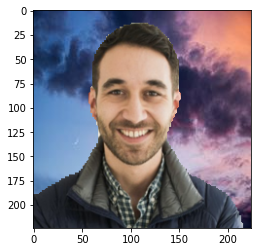

In [168]:
complete_image_newbg = masked_image + crop_background_new
plt.imshow(complete_image_newbg)